Objective : Creating a linear regression model, knowing the limit, and updating to ploynomial regression model.

In [1]:
# Creating a non-linear dataset
import pandas as pd
import numpy as np

np.random.seed(42) # Initializing
X = np.random.rand(100, 1)*10 # *10 make it big as hell
y = 3*X.squeeze()**2 + 2*X.squeeze() + 1 + np.random.rand(100)*10 # Squeeze() reduce dimension

df = pd.DataFrame({'X':X.squeeze(), 'y':y})

In [5]:
# Try linear regression first
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size = 0.2, random_state = 42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

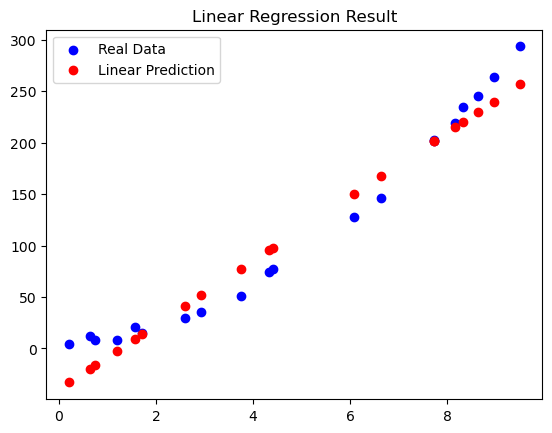

RMSE: 20.674521717490258
R²: 0.9567477541719718


In [19]:
# Evaluating and visualizing
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score

plt.scatter(X_test, y_test, color = 'blue', label = 'Real Data')
plt.scatter(X_test, y_pred, color = 'red', label = 'Linear Prediction')
plt.legend()
plt.title("Linear Regression Result")
plt.show()

print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

The model explains most of the variance but fails to capture the non-linear pattern, leading to a large prediction error.

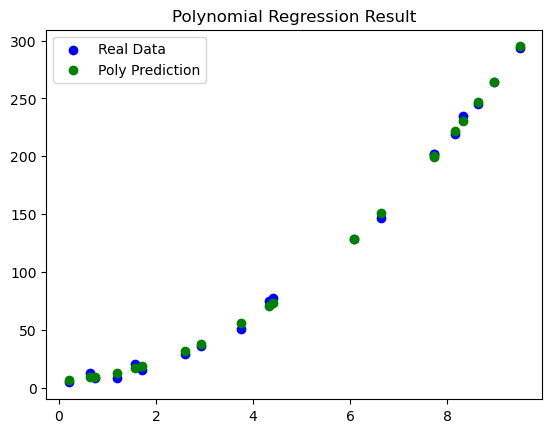

RMSE (poly): 3.0925933160837773
R² (poly): 0.9990322050631606


In [17]:
# Making polynomial regression model to try to gey a better result
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                       ('linreg', LinearRegression())])

poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

plt.scatter(X_test, y_test, color = 'blue', label = 'Real Data')
plt.scatter(X_test, y_poly_pred, color = 'green', label = 'Poly Prediction')
plt.legend()
plt.title("Polynomial Regression Result")
plt.show()

print("RMSE (poly):", root_mean_squared_error(y_test, y_poly_pred))
print("R² (poly):", r2_score(y_test, y_poly_pred))

A significant improvement in both accuracy and fit. The model captures the underlying curve much better.

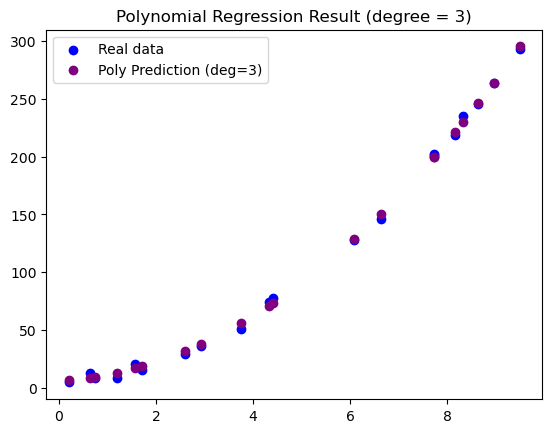

RMSE (poly deg=3): 3.138428178800757
R² (poly deg=3): 0.9990033053917947


In [27]:
# Trying if higher degree gives better result
poly3_model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                        ('linreg', LinearRegression())])

poly3_model.fit(X_train, y_train)

y_poly3_pred = poly3_model.predict(X_test)

plt.scatter(X_test, y_test, color = 'blue', label = 'Real data')
plt.scatter(X_test, y_poly3_pred, color = 'purple', label = 'Poly Prediction (deg=3)')
plt.legend()
plt.title("Polynomial Regression Result (degree = 3)")
plt.show()

print("RMSE (poly deg=3):", root_mean_squared_error(y_test, y_poly3_pred))
print("R² (poly deg=3):", r2_score(y_test, y_poly3_pred))

Compared to degree = 2, the performance slightly dropped. This suggests that adding unnecessary complexity may lead to overfitting without improving accuracy.